# Importing Data from PostgresSQL Server#

After establishing a PostgresSQL server and uploading all of our group data, we will pull the data to use for analysis

In [1]:
import psycopg2 as pg2
from psycopg2.extras import RealDictCursor, Json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

We are creating a function to connect to the database and query the database

In [2]:
%run sql_test.py

In [3]:
def con_cur_to_db(dbname=DBNAME, dict_cur=None):
    ''' 
    Returns both a connection and a cursor object for your database
    '''

    con = pg2.connect(host=IP_ADDRESS,
                  dbname=dbname,
                  user=USER,
                  password=PASSWORD)
    if dict_cur:
        cur = con.cursor(cursor_factory=RealDictCursor)
    else:
        cur = con.cursor()
    return con, cur
    
def execute_query(query, dbname=DBNAME, dict_cur=None, command=False):
    '''
    Executes a query directly to a database, without having to create a cursor and connection each time. 
    '''
    con, cur = con_cur_to_db(dbname, dict_cur)
    cur.execute(f'{query}')
    if not command:
        data = cur.fetchall()
        con.close()
        return data
    con.commit()
    con.close()

### Executing query and Importing Yelp Data ###

In [62]:
steve_query = '''SELECT  
name,
id,
price,
alias,
type,
type,
rating,
location,
latitude,
longitude

FROM 
david_table;
'''

In [55]:
steve_list = execute_query(steve_query)

In [63]:
david_list = execute_query(david_query)

In [50]:
hov_list = execute_query(hov_query)

Creating a DataFrame with the list pulled from database

In [64]:
yelp_df_2 = pd.DataFrame(david_list, columns = [
    'name', 'id', 'price', 'alias', 'type', 'category', 'rating', 'zip', 'latitude', 'longitude'])

In [65]:
yelp_df_2['zip']=yelp_df_2['zip'].astype('int64')

We are combining 3 different Yelp dataframes into one Restaurant dataframe. There is some data that does not belong (outside Zipcode parameters) and will be dropped.

In [69]:
yelp_df = pd.concat([yelp_df_1, yelp_df_2, yelp_df_3])

In [70]:
yelp_df[yelp_df['zip']<90000]

,name,id,price,alias,type,category,rating,zip,latitude,longitude
1330,Pop Art,4Vt-_pOpIMLHj4Pa1eM-qg,1.0,pop-art-los-angeles-4,desserts,desserts,5.0,78704,34.0478,-118.2410
6083,Starbucks,XjNSmeYINzmw64ufoaoxmQ,2.0,starbucks-mesquite,coffee,coffee,2.5,89027,36.8147,-114.0660
9555,Sandwich University,5MbFGzdLpBNXz2q1Z3uRIA,2.0,sandwich-university-morgantown-2,sandwiches,sandwiches,3.5,26505,39.6318,-79.9544
9960,le nouveau siecle,N0p2aiJ429dHrbZxF4pPMA,2.0,le-nouveau-siecle-vernon,chinese,chinese,5.0,27200,33.9996,-118.2040
11303,Lock and Key Events,dXBBpsq5zwdGoiXQtFwdnA,2.0,lock-and-key-events-los-angeles-2,bars,bars,2.0,48093,34.0535,-118.2450
258,Pop Art,4Vt-_pOpIMLHj4Pa1eM-qg,1.0,pop-art-los-angeles-4,desserts,desserts,5.0,78704,34.0478,-118.2410


In [71]:
yelp_df.drop(index=[1330, 6083, 9555, 9960, 11303, 258], inplace = True)

In [74]:
yelp_df[yelp_df['latitude']>40]

,name,id,price,alias,type,category,rating,zip,latitude,longitude
4498,Gallagher's Irish Pub,KyJSbA4nS5ASlpL65QCd5g,2.0,gallaghers-irish-pub-scotia,irish_pubs,irish_pubs,3.0,95565,40.4845,-124.101


In [75]:
yelp_df.drop(index=[4498], inplace = True)

**Exporting New Restaurant DataFrame**

In [ ]:
yelp_df.to_csv('./data/yelp_combined.csv', header=yelp_df.columns)

### Executing Query and Importing Properties ###

In [25]:
property_query = '''SELECT  
AIN,
PropertyLocation,
location,
LandBaseYear,
netTaxableValue,
latitude,
longitude,
cluster

FROM 
property_table;
'''

In [26]:
property_list = execute_query(property_query)

In [27]:
property_df = pd.DataFrame(property_list, columns = [
    'property_id', 'address', 'zip', 'year_reassessed', 'value', 'latitude', 'longitude', 'county_cluster'])

In [28]:
property_df.head()

,property_id,address,zip,year_reassessed,value,latitude,longitude,county_cluster
0,2872021039,18501 CALLE VISTA CIR LOS ANGELES CA 91326,91326,2017,1288400.0,34.2853,-118.535,2102
1,2872021038,18500 CALLE VISTA CIR LOS ANGELES CA 91326,91326,2011,619286.0,34.2849,-118.534,2102
2,2872021017,18504 ENTRADA CT LOS ANGELES CA 91326,91326,2012,618184.0,34.2842,-118.534,2102
3,2872021010,18526 ENTRADA CT LOS ANGELES CA 91326,91326,2014,748768.0,34.2829,-118.535,2102
4,2872021001,18501 BRASILIA DR LOS ANGELES CA 91326,91326,2011,613655.0,34.2823,-118.535,2102


**Exporting New Property DataFrame**

In [ ]:
property_df.to_csv('./data/property_df_cleaned.csv', header=property_df.columns)

**Visualizing Restaurants over Homes**


Some extreme outliers exist in our Restaurant samples. This will be addressed in next preprocessing notebook

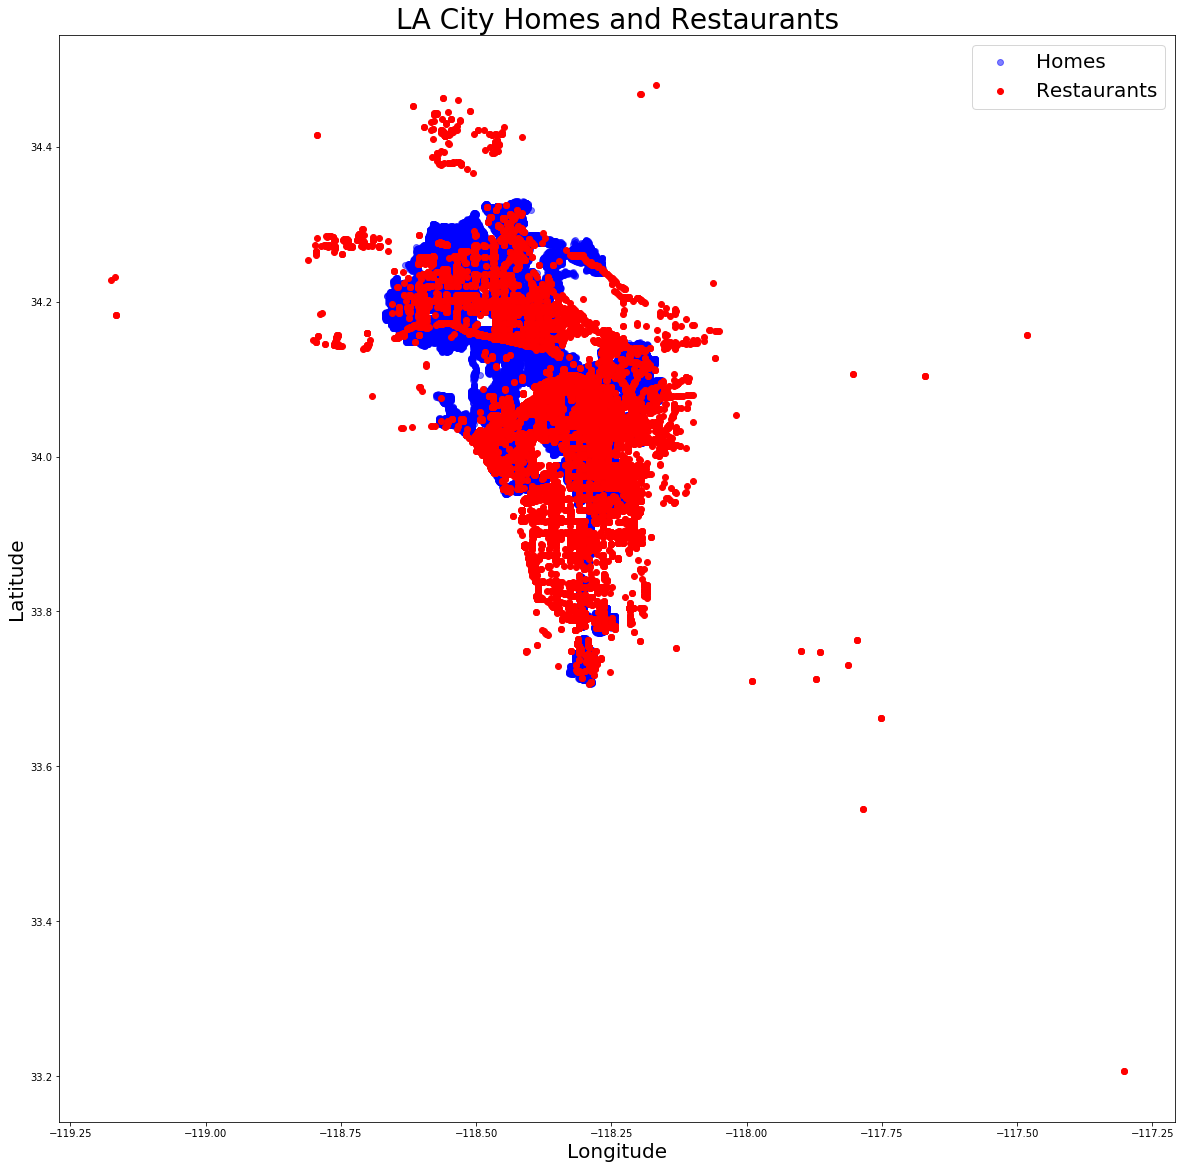

In [82]:
fig, ax = plt.subplots(figsize =(20,20))
ax.scatter(property_df['longitude'], property_df['latitude'], color='b', alpha=0.5, label='Homes')
plt.scatter(yelp_df['longitude'], yelp_df['latitude'], color='red', label='Restaurants')
plt.title('LA City Homes and Restaurants', fontsize=28)
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
ax.legend(fontsize=20);